# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    params = {
        "q":city,
        "appid": weather_api_key,
        "units": "metric"
    }

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        run_requests = requests.get(url, params=params)
        # Parse the JSON and retrieve data
        city_weather = run_requests.json()

    #     # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

    #     # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | bakchar
Processing Record 4 of Set 1 | pingzhuang
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | saacow
Processing Record 7 of Set 1 | raja
Processing Record 8 of Set 1 | port angeles
Processing Record 9 of Set 1 | alice springs
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | sur
Processing Record 12 of Set 1 | olonkinbyen
Processing Record 13 of Set 1 | lazaro cardenas
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | kete krachi
Processing Record 17 of Set 1 | nelidovo
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,2.25,93,100,0.51,CL,1722710518
1,bethel,41.3712,-73.4140,33.13,64,75,4.12,US,1722710519
2,bakchar,57.0186,82.0711,17.36,97,100,0.12,RU,1722710519
3,pingzhuang,42.0372,119.2889,22.83,97,100,2.89,CN,1722710520
4,adamstown,-25.0660,-130.1015,20.83,72,19,6.30,PN,1722710520


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,2.25,93,100,0.51,CL,1722710518
1,bethel,41.3712,-73.4140,33.13,64,75,4.12,US,1722710519
2,bakchar,57.0186,82.0711,17.36,97,100,0.12,RU,1722710519
3,pingzhuang,42.0372,119.2889,22.83,97,100,2.89,CN,1722710520
4,adamstown,-25.0660,-130.1015,20.83,72,19,6.30,PN,1722710520


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

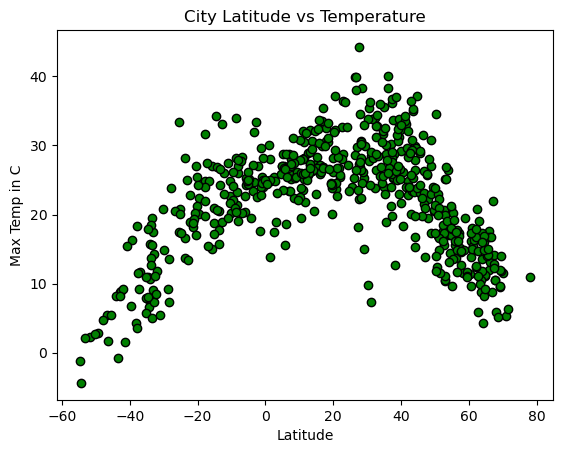

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
Lat = city_data_df['Lat']
temp = city_data_df['Max Temp']
plt.scatter(Lat, temp, edgecolors='black', color= 'green')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Max Temp in C')
plt.title('City Latitude vs Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

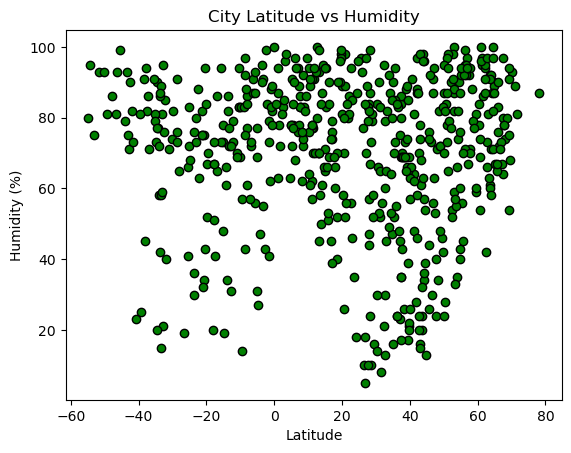

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
lat = city_data_df['Lat']
humidity = city_data_df['Humidity']
plt.scatter(Lat, humidity, edgecolors='black', color= 'green')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

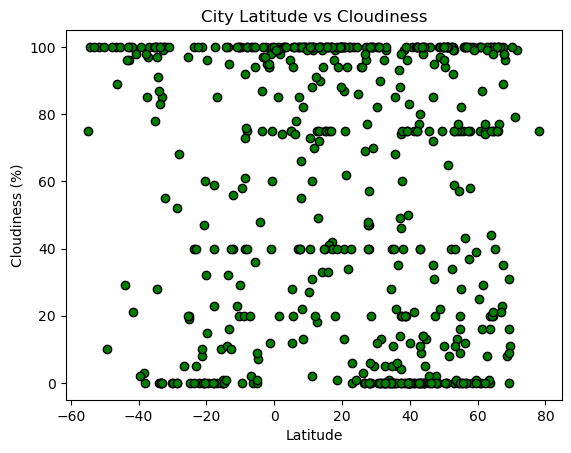

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
lat = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']
plt.scatter(Lat, cloudiness, edgecolors='black', color= 'green')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness') 

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

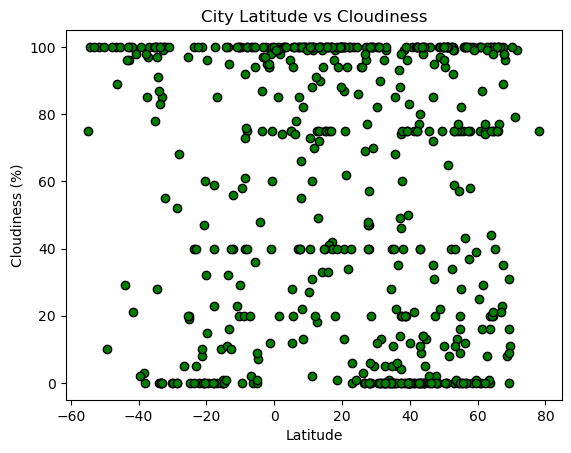

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
lat = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']
plt.scatter(Lat, cloudiness, edgecolors='black', color= 'green')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
x_axis = lat
y_axis = temp
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(x_axis, y_axis)
regress = x_axis * pe_slope + pe_int
line_eq = "y =" + str(round(pe_slope, 2)) + "x =" +str(round(pe_int,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df= city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,33.13,64,75,4.12,US,1722710519
2,bakchar,57.0186,82.0711,17.36,97,100,0.12,RU,1722710519
3,pingzhuang,42.0372,119.2889,22.83,97,100,2.89,CN,1722710520
5,saacow,1.6279,42.4407,24.88,72,98,8.33,SO,1722710521
6,raja,8.4596,25.6780,22.42,92,82,1.49,SS,1722710521


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df= city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,2.25,93,100,0.51,CL,1722710518
4,adamstown,-25.0660,-130.1015,20.83,72,19,6.30,PN,1722710520
8,alice springs,-23.7000,133.8833,13.75,30,40,3.60,AU,1722710522
9,new norfolk,-42.7826,147.0587,8.84,71,96,3.99,AU,1722710523
13,puerto ayora,-0.7393,-90.3518,23.98,82,75,3.13,EC,1722710525


###  Temperature vs. Latitude Linear Regression Plot

R squared: -0.5983670615192223


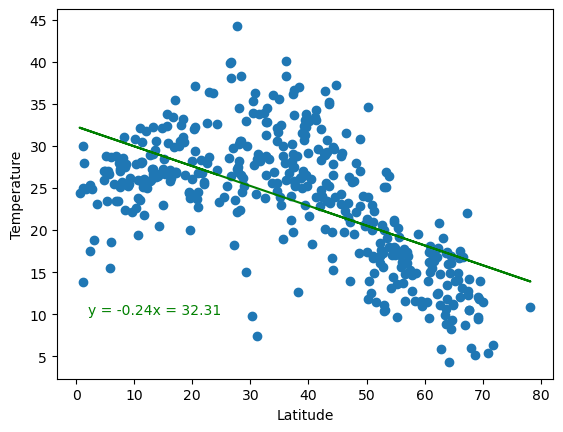

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
northhemi_lat = northern_hemi_df['Lat']
northhemi_temp = northern_hemi_df['Max Temp']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress (northhemi_lat, northhemi_temp)
tl_regress = northhemi_lat * pe_slope + pe_int
line_eq = "y = " + str(round(pe_slope, 2)) + "x = " + str(round(pe_int, 2))

# Plot scatter chart
plt.scatter (northhemi_lat, northhemi_temp)

#plot regression line
plt.plot(northhemi_lat,tl_regress, c= "g")
plt.annotate(line_eq,(2,10), fontsize=10, color="green")

#label
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Print r squared 
print(f"R squared: {pe_r}")

R squared: 0.8308313231453642


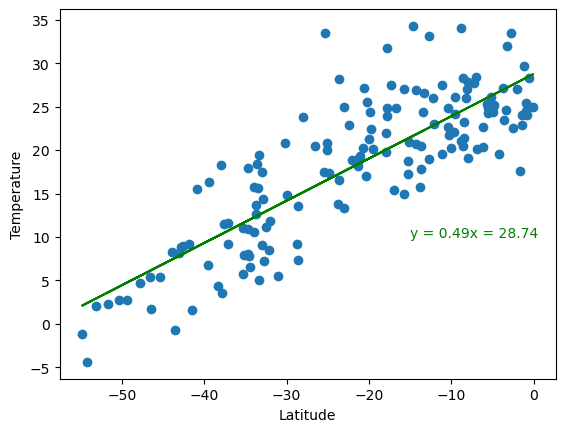

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
southhemi_lat = southern_hemi_df['Lat']
southhemi_temp = southern_hemi_df['Max Temp']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress (southhemi_lat, southhemi_temp)
tl_regress = southhemi_lat * pe_slope + pe_int
line_eq = "y = " + str(round(pe_slope, 2)) + "x = " + str(round(pe_int, 2))

# Plot scatter chart
plt.scatter (southhemi_lat, southhemi_temp)

#plot regression line
plt.plot(southhemi_lat,tl_regress, c= "g")
plt.annotate(line_eq,(-15,10), fontsize=10, color="green")

#label
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Print r squared 
print(f"R squared: {pe_r}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R squared: -0.00901711582007287


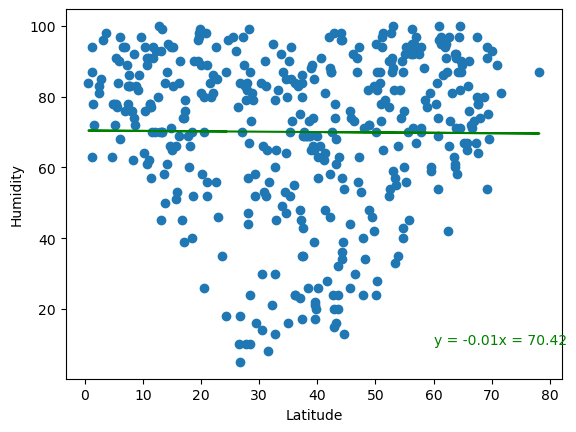

In [18]:
# Northern Hemisphere
# YOUR CODE HERE
northhemi_lat = northern_hemi_df['Lat']
northhemi_humid = northern_hemi_df['Humidity']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress (northhemi_lat, northhemi_humid)
tl_regress = northhemi_lat * pe_slope + pe_int
line_eq = "y = " + str(round(pe_slope, 2)) + "x = " + str(round(pe_int, 2))

# Plot scatter chart
plt.scatter (northhemi_lat, northhemi_humid)

#plot regression line
plt.plot(northhemi_lat,tl_regress, c= "g")
plt.annotate(line_eq,(60,10), fontsize=10, color="green")

#label
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r squared 
print(f"R squared: {pe_r}")

R squared: -0.0634282796739253


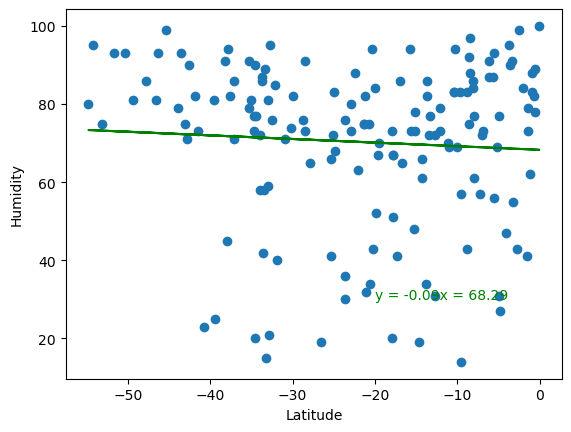

In [19]:
# Southern Hemisphere
# YOUR CODE HERE
southhemi_lat = southern_hemi_df['Lat']
southhemi_humid = southern_hemi_df['Humidity']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress (southhemi_lat, southhemi_humid)
tl_regress = southhemi_lat * pe_slope + pe_int
line_eq = "y = " + str(round(pe_slope, 2)) + "x = " + str(round(pe_int, 2))

# Plot scatter chart
plt.scatter (southhemi_lat, southhemi_humid)

#plot regression line
plt.plot(southhemi_lat,tl_regress, c= "g")
plt.annotate(line_eq,(-20,30), fontsize=10, color="green")

#label
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r squared 
print(f"R squared: {pe_r}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R squared: -0.17725307512218894


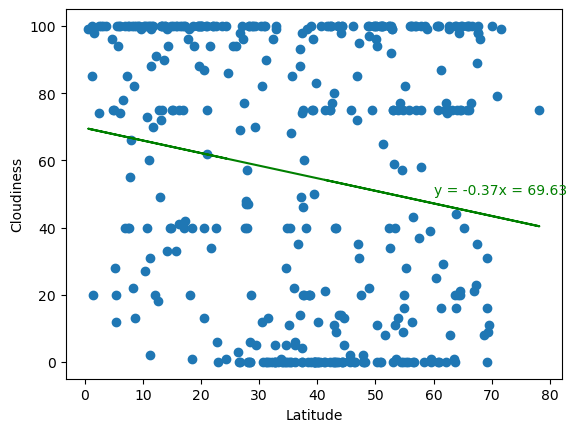

In [20]:
# Northern Hemisphere
# YOUR CODE HERE
northhemi_lat = northern_hemi_df['Lat']
northhemi_cloud = northern_hemi_df['Cloudiness']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress (northhemi_lat, northhemi_cloud)
tl_regress = northhemi_lat * pe_slope + pe_int
line_eq = "y = " + str(round(pe_slope, 2)) + "x = " + str(round(pe_int, 2))

# Plot scatter chart
plt.scatter (northhemi_lat, northhemi_cloud)

#plot regression line
plt.plot(northhemi_lat,tl_regress, c= "g")
plt.annotate(line_eq,(60,50), fontsize=10, color="green")

#label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r squared 
print(f"R squared: {pe_r}")

R squared: -0.12482209321315145


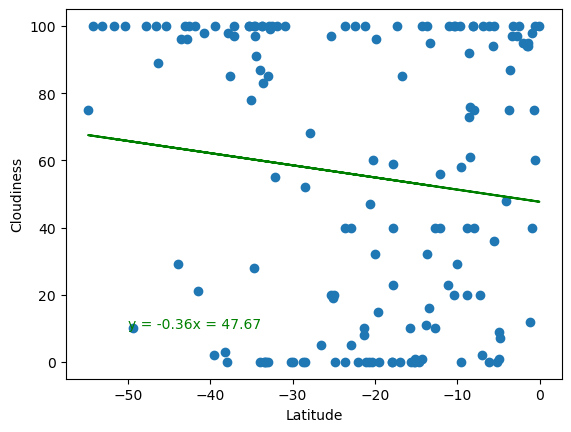

In [21]:
# Southern Hemisphere
# YOUR CODE HERE
southhemi_lat = southern_hemi_df['Lat']
southhemi_cloud = southern_hemi_df['Cloudiness']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress (southhemi_lat, southhemi_cloud)
tl_regress = southhemi_lat * pe_slope + pe_int
line_eq = "y = " + str(round(pe_slope, 2)) + "x = " + str(round(pe_int, 2))

# Plot scatter chart
plt.scatter (southhemi_lat, southhemi_cloud)

#plot regression line
plt.plot(southhemi_lat,tl_regress, c= "g")
plt.annotate(line_eq,(-50,10), fontsize=10, color="green")

#label
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r squared 
print(f"R squared: {pe_r}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE
 Cloudiness relationship with latitude overall is sparce with neagative slope of -0.36. There is slightly more concentration of cloudier cities in the nothern hemishpere.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: -0.052868938164798734


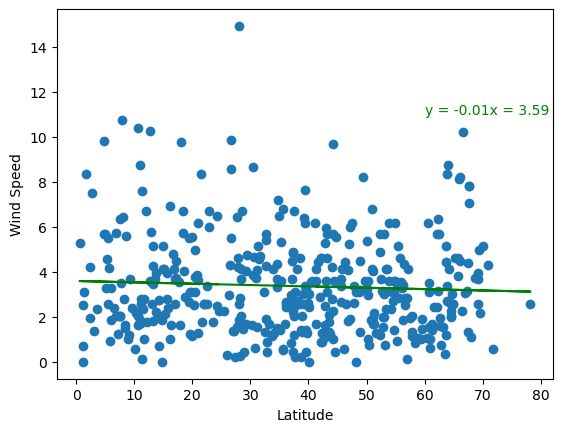

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
northhemi_lat = northern_hemi_df['Lat']
northhemi_ws = northern_hemi_df['Wind Speed']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress (northhemi_lat, northhemi_ws)
tl_regress = northhemi_lat * pe_slope + pe_int
line_eq = "y = " + str(round(pe_slope, 2)) + "x = " + str(round(pe_int, 2))

# Plot scatter chart
plt.scatter (northhemi_lat, northhemi_ws)

#plot regression line
plt.plot(northhemi_lat,tl_regress, c= "g")
plt.annotate(line_eq,(60,11), fontsize=10, color="green")

#label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r squared 
print(f"R squared: {pe_r}")

R squared: -0.005952309171305337


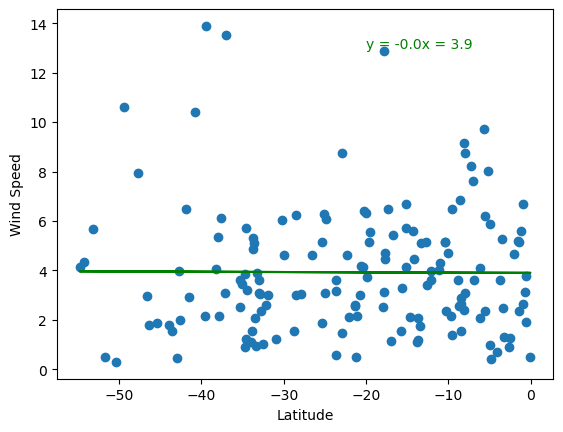

In [23]:
# Southern Hemisphere
# YOUR CODE HERE
southhemi_lat = southern_hemi_df['Lat']
southhemi_ws = southern_hemi_df['Wind Speed']
pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress (southhemi_lat, southhemi_ws)
tl_regress = southhemi_lat * pe_slope + pe_int
line_eq = "y = " + str(round(pe_slope, 2)) + "x = " + str(round(pe_int, 2))

# Plot scatter chart
plt.scatter (southhemi_lat, southhemi_ws)

#plot regression line
plt.plot(southhemi_lat,tl_regress, c= "g")
plt.annotate(line_eq,(-20, 13), fontsize=10, color="green")

#label
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r squared 
print(f"R squared: {pe_r}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE
There is a higher concentration of cities with higher win spends in latitudes higher than -30